In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Maze to complete with Temporal Difference Learning

> The start state is the position (0,0)\
> Final state is (6,6)\
> Every step counts as -1 reward until the terminal state, which holds a reward of +1

In [86]:
def make_obstacles(maze,value):   
    maze[0][1] = value
    maze[1][3], maze[1][4], maze[1][6] = value,value,value
    maze[2][0], maze[2][1], maze[2][2], maze[2][6] = value,value,value,value
    maze[3][4], maze[3][5] = value,value
    maze[4][1], maze[4][2], maze[4][3] = value,value,value
    maze[5][1] = value
    maze[6][3] = value
    
    return maze

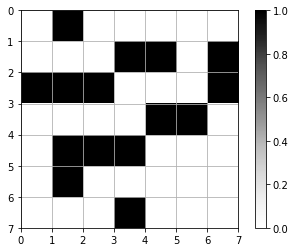

In [87]:
#You can generate a random 8x8 maze like this:
maze = np.zeros(shape=(7,7))
maze = make_obstacles(maze,1)

plt.imshow(maze,origin='upper',extent= (0, 7, 7, 0),cmap='Greys')
#plt.xticks(np.arange(0,10, 1.0))
#plt.yticks(np.arange(0,10, 1.0))
plt.grid()
plt.colorbar()

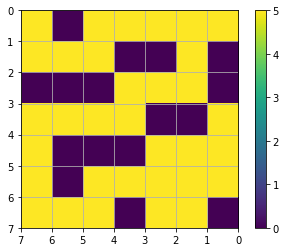

In [88]:
V = np.ones(shape=(7,7)) * 5
V[6,6] = 0
make_obstacles(V,0)

plt.imshow(V,origin='upper',extent= (7 , 0, 7, 0));

plt.grid()
plt.colorbar()

In [89]:
obstacles = make_obstacles(maze,1)

def wall(state_x,state_y):
    
    if((state_x >= 0) & (state_x <= 6) & (state_y >= 0) & (state_y <= 6)):
        if(obstacles[state_x,state_y] != 1):
                return False    
    return True

def possible_states(state):
    state_x,state_y = state
    possible_states = []
    
    #if it's wall it isn't a possible state
    if(not wall(state_x+1,state_y)):
        possible_states.append(((state_x+1,state_y),'D'))
    if(not wall(state_x-1,state_y)):
        possible_states.append(((state_x-1,state_y),'U'))
    if(not wall(state_x,state_y+1)):
        possible_states.append(((state_x,state_y+1),'R'))
    if(not wall(state_x,state_y-1)):
        possible_states.append(((state_x,state_y-1),'L'))
    
    return possible_states

possible_states((6,0))

[((5, 0), 'U'), ((6, 1), 'R')]

In [90]:
import random

def policy(state):
    #possible next states
    neighbour_states = possible_states(state)
    
    #values of the next possible states, ensure that they are positive because I'm normalizing them
    values = np.abs([V[i,y] for ((i,y),c) in neighbour_states])
    next_states = [c for ((i,y),c) in neighbour_states]
    
    #probability distribution associated with the value states
    probs = values/np.sum(values)
    
    #exploration
    if(np.random.random() < 0.4):
        return np.random.choice(next_states)
    else:
        return np.random.choice(next_states,p=probs)

    
policy((5,6))

'D'

## Main program

Hyper-parameters

In [91]:
start_state = (0,0)
terminal_state = (6,6)

learning_rate = 0.001

discount_factor = 0.99

num_iterations = 10
#each iteration have 10 episodes
num_episodes = 20

In [92]:
def step(state,action):
    
    x,y = state
    reward = -1
    
    if(action == 'U'):
        next_state = (x-1,y)
    elif(action == 'D'):
        next_state = (x+1,y)
    elif(action == 'R'):
        next_state = (x,y+1)
    elif(action == 'L'):
        next_state = (x,y-1)
        
    if(next_state == (6,6)):
        reward = 1
    
    return next_state, reward

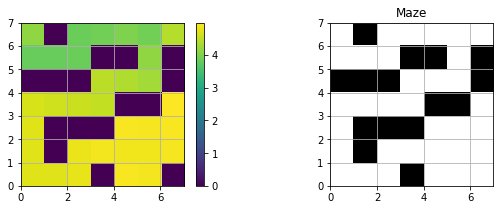

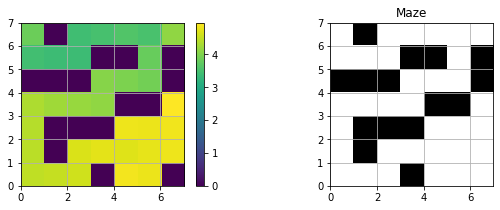

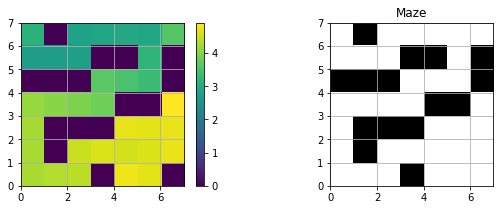

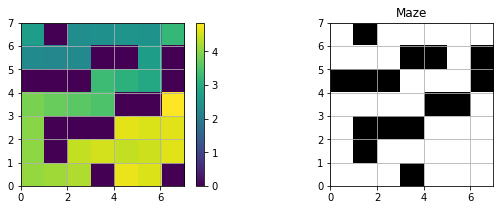

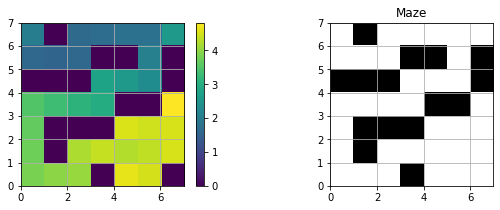

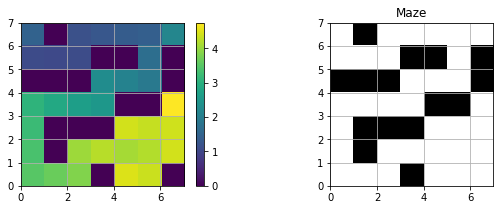

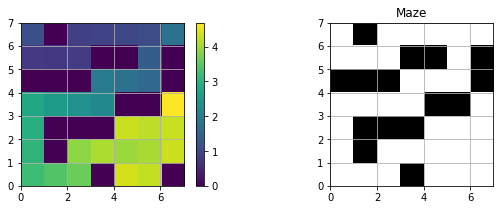

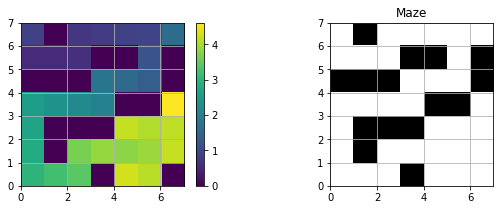

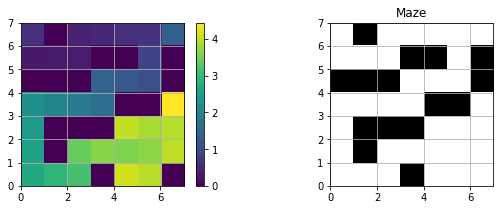

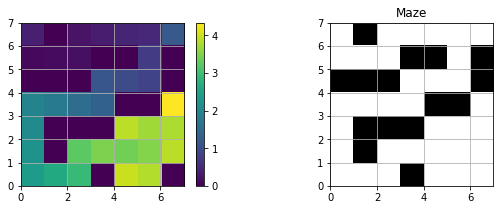

In [93]:
V_updates = []
V_updates.append(V.copy())

for iteration in range(num_iterations):
       
    for episode in range(num_episodes):
        
        state = start_state
        
        while(state != terminal_state):
            
            
            #choose the next state based on values distribution
            action = policy(state)  
            
            #take action, observe next_state and reward
            next_state,reward = step(state,action)
            
            
            #if the next_state == terminal_state then V[next_state] is 0 so it's only the reward - V[state]
            V[state] = V[state] + learning_rate * (reward + discount_factor * V[next_state] - V[state])
            
            state = next_state
            
       
    if(iteration % 1 == 0):
        
        if(iteration == 0 or iteration == 3 or iteration == 9 ):
            V_updates.append(V.copy())
            #break
        
        plt.figure(figsize=(10,3))
        plt.title("State values of iteration " + str(iteration+1))
        plt.subplot(1,2,1)
        plt.imshow(V,origin='upper',extent= (0, 7, 0, 7))
        plt.grid()
        plt.colorbar();
        plt.subplot(1,2,2)
        plt.title("Maze")
        plt.imshow(maze,origin='upper',extent= (0, 7, 0, 7),cmap='binary')
        plt.grid()
        plt.show()
        
            

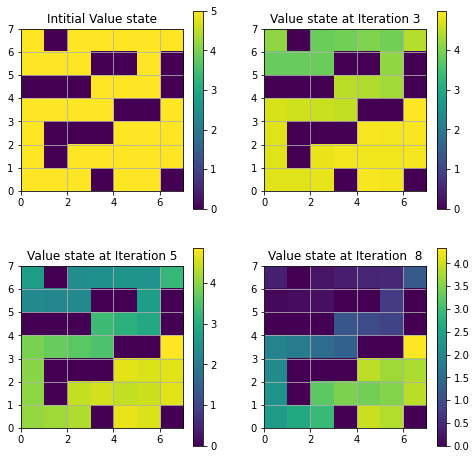

In [108]:
plt.figure(figsize=(8,8))

for i in range(len(V_updates)):
    if(i==1):
        plt.title("Intitial Value state")
    else:
        plt.title("Value state at Iteration {0}".format(i*2-1))
        
    plt.subplot(2,2,i+1)
    plt.imshow(V_updates[i],origin='upper',extent= (0, 7, 0, 7))
    plt.grid()
    plt.colorbar();
plt.title("Value state at Iteration  8")
plt.show()